In [91]:
#pip install geopy

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
from pylab import rcParams
import geopy.distance
import numpy as np

In [2]:
df = pd.read_csv('final_df.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
links = pd.read_csv('11k_flats.csv')
links.drop(columns='Unnamed: 0',inplace=True)
links.head()

,flat_links
0,https://domclick.ru/card/sale__flat__1847719187
1,https://domclick.ru/card/sale__flat__1798260328
2,https://domclick.ru/card/sale__flat__1786363895
3,https://domclick.ru/card/sale__flat__1854172438
4,https://domclick.ru/card/sale__flat__1849710256


In [4]:
df = df.merge(links,left_index=True, right_index=True)

# EDA

In [5]:
print(df.shape)
df.head()

(12157, 50)


,flat_price,Комнат,Площадь,Жилая,Кухня,Этаж,Ремонт,Тип сделки,Лет в собственности,Год постройки,Материал стен,Серия дома,Количество этажей,Лифт,Количество квартир,latitude,longitude,Вид из окон,Тип перекрытий,Горячее водоснабжение,Количество собственников,Мусоропровод,Несовершеннолетние собственники,Прописанные несовершеннолетние,Количество балконов,Тип фундамента,Балкон,Количество лифтов,Грузовой лифт,Высота потолков,price_stats,Детская площадка,Перепланировка,Газ,Спортивная площадка,Год ввода в эксплуатацию,Количество подъездов,Наименьшее количество этажей,Предоплата,Залог,Класс энергоэффективности,Прописано,Коммунальные платежи,Холодное водоснабжение,Комнат в квартире,Площадь комнаты,Теплоснабжение,Санузел,Энергоснабжение,flat_links
0,23 950 000,3.0,"73,8",45,10,2.0,Косметический,Свободная продажа,От трех до пяти,2002.0,Железобетон,П-44Т,17.0,есть,798.0,55.672011,37.570878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://domclick.ru/card/sale__flat__1847719187
1,14 500 000,1.0,"48,4","20,2","14,6",7.0,Евро,Свободная продажа,NaN,2015.0,Монолитный,а-типовой,27.0,есть,51.0,55.558641,37.559308,во,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://domclick.ru/card/sale__flat__1798260328
2,59 990 000,3.0,90,54,15,7.0,Отсутствует,Свободная продажа,NaN,2020.0,Монолитный,NaN,11.0,NaN,171.0,55.754279,37.544764,во,Железобетонный,Центральное,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://domclick.ru/card/sale__flat__1786363895
3,16 800 000,2.0,51,"35,6","8,7",1.0,косметический,Свободная продажа,NaN,1969.0,Кирпичный,"14/14, индивидуальный",14.0,есть,NaN,55.684102,37.544432,во,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://domclick.ru/card/sale__flat__1854172438
4,14 599 000,2.0,47,29,"6,5",6.0,Дизайнерский,Свободная продажа,Меньше трех,1969.0,Железобетон,1-515-9,9.0,есть,216.0,"55.63194,",7.602633},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://domclick.ru/card/sale__flat__1849710256


# Смотрим на долю пропусков

In [6]:
df = df[df.isna().mean()[df.isna().mean()*100 < 40].index]

In [7]:
pd.DataFrame(df.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
flat_price,0.6
Комнат,2.1
Площадь,0.6
Жилая,19.7
Кухня,8.4
Этаж,0.6
Ремонт,21.8
Тип сделки,10.1
Год постройки,3.5
Материал стен,3.8


# Переименовываем

In [294]:
df.rename(columns={'Комнат':'rooms'},inplace=True)
df.rename(columns={'Площадь':'area'},inplace=True)
df.rename(columns={'Жилая':'living_area'},inplace=True)
df.rename(columns={'Кухня':'kitchen_area'},inplace=True)
df.rename(columns={'Этаж':'floor'},inplace=True)
df.rename(columns={'Ремонт':'finishing'},inplace=True)
df.rename(columns={'Тип сделки':'deal_type'},inplace=True)
df.rename(columns={'Лет в собственности':'ownership_years'},inplace=True)
df.rename(columns={'Год постройки':'house_age'},inplace=True)
df.rename(columns={'Материал стен':'wall_material'},inplace=True)
df.rename(columns={'Серия дома':'house_series'},inplace=True)
df.rename(columns={'Количество этажей':'house_floors'},inplace=True)
df.rename(columns={'Лифт':'elevator'},inplace=True)

# Перевожу несколько колонок сразу в float

In [295]:
df['flat_price'] = df['flat_price'].str.replace(' ','').astype(float)
df['area'] = df['area'].str.replace(',','.').astype(float)
df['kitchen_area'] = df['kitchen_area'].str.replace(',','.').astype(float)
df['living_area'] = df['living_area'].str.replace(',','.').astype(float)

## Стоимость квартир

In [296]:
df['flat_price'].fillna(0,inplace=True)
df['flat_price'] = df['flat_price'] / 1_000_000

df = df[df['flat_price'] > 0]
df = df[df['flat_price'] < 400]

In [297]:
df['flat_price'].describe()

count    12009.000000
mean        33.076261
std         48.073537
min          0.030000
25%         11.550000
50%         16.600000
75%         29.999999
max        399.400270
Name: flat_price, dtype: float64

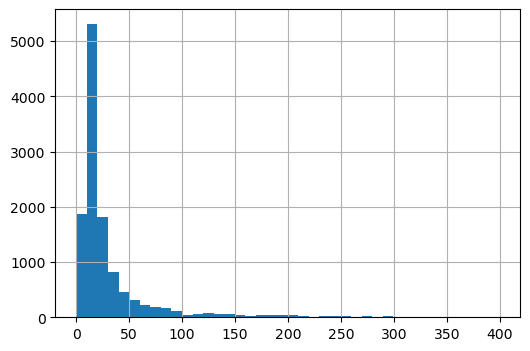

In [298]:
df['flat_price'].hist(bins=40);

Выводы следующие:

- Нет стоимости у 67 квартир, их можно выбросить

- Можно выбросить квартиры стоимостью более 400 млн (76 штук)

# Площадь

In [299]:
df['area'].describe()

count    12009.000000
mean        70.749338
std         54.251320
min          7.000000
25%         38.900000
50%         54.100000
75%         79.000000
max        693.000000
Name: area, dtype: float64

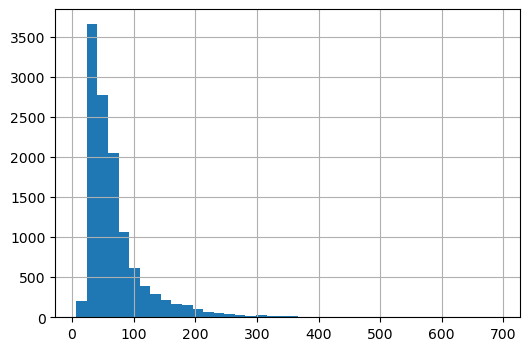

In [300]:
df['area'].hist(bins=40);

# Кол-во комнат

In [301]:
df['rooms'].describe()

count    11825.000000
mean         2.184863
std          1.205110
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: rooms, dtype: float64

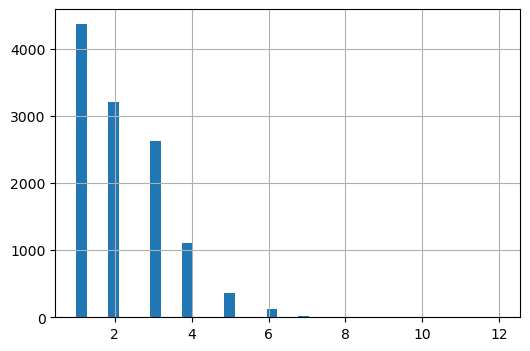

In [302]:
df['rooms'].hist(bins=40);

In [303]:
print(df['rooms'].isna().mean())
df.dropna(subset='rooms',inplace=True)
df['rooms'].isna().mean()

0.015321841951869431


0.0

# Жилая площадь

In [304]:
df['living_area'].describe()

count    9611.000000
mean       38.202476
std        31.033342
min         3.000000
25%        19.100000
50%        30.000000
75%        45.200000
max       600.000000
Name: living_area, dtype: float64

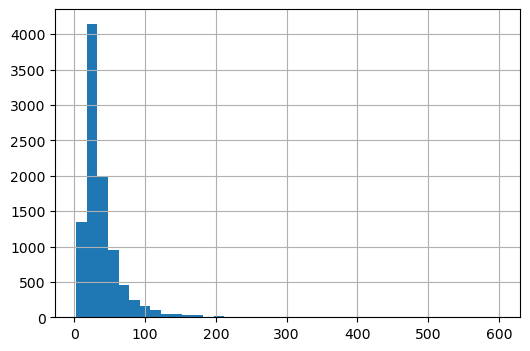

In [305]:
df['living_area'].hist(bins=40);

In [306]:
df['living_area'].isna().mean()

0.18723044397463

Заполню эти пропуски средними значениями на кол-во комнат в квартире

In [307]:
df[df['rooms']!=9].groupby('rooms',as_index=False)['living_area'].mean()

,rooms,living_area
0,1.0,18.754882
1,2.0,32.247443
2,3.0,50.125292
3,4.0,79.506505
4,5.0,122.895726
5,6.0,172.846479
6,7.0,167.260000
7,8.0,213.325000
8,10.0,204.000000
9,12.0,403.000000


In [308]:
df['living_area'] = df['living_area'].fillna(df[df['rooms']!=9].groupby('rooms')['living_area'].transform('mean'))

In [309]:
df.dropna(subset='living_area',inplace=True)

# Кухня

In [311]:
df['kitchen_area'].describe()

count    10987.000000
mean        12.240684
std          7.349331
min          1.000000
25%          8.150000
50%         10.000000
75%         14.000000
max        180.000000
Name: kitchen_area, dtype: float64

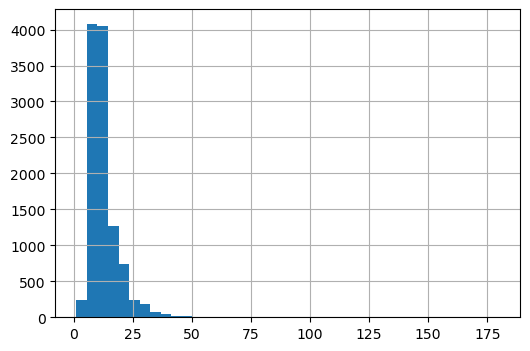

In [312]:
df['kitchen_area'].hist(bins=40);

In [313]:
df.kitchen_area.isna().mean()

0.07070963376469593

Заполню эти пропуски средними значениями на кол-во комнат в квартире

In [314]:
df.groupby('rooms',as_index=False)['kitchen_area'].mean()

,rooms,kitchen_area
0,1.0,10.147292
1,2.0,11.527034
2,3.0,13.041894
3,4.0,18.169965
4,5.0,22.973913
5,6.0,26.970886
6,7.0,30.671429
7,8.0,18.725000
8,10.0,33.500000
9,12.0,20.000000


In [315]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('mean'))

# Этаж квартиры

In [316]:
df['floor'].describe()

count    11823.000000
mean         8.605007
std          7.339516
min          1.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         82.000000
Name: floor, dtype: float64

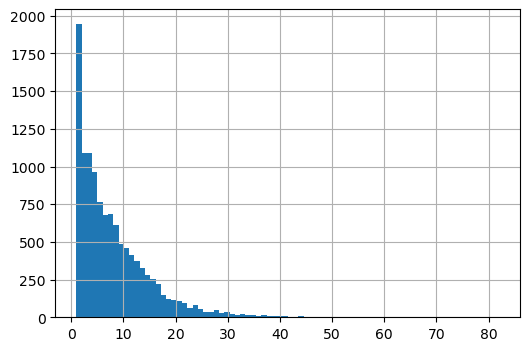

In [317]:
df['floor'].hist(bins=80);

In [320]:
df['floor'].value_counts().head(10)

2.0     1177
3.0     1090
4.0     1089
5.0      967
1.0      769
6.0      766
8.0      688
7.0      681
9.0      614
10.0     483
Name: floor, dtype: int64

# Ремонт

In [321]:
df['finishing'].fillna('Не известно',inplace=True)

In [322]:
df['finishing'].replace({'Евроремонт':'Евро','Евро ремонт':'Евро','euro':'Евро','cosmetic':'Косметический',
                        'design':'Дизайнерский','евроремонт':'Евро','Без ремонта':'Отсутствует','косметический':'Косметический',
                         'Хороший':'Косметический'
                        },inplace=True)

In [323]:
df['finishing'].value_counts()

Не известно             2532
Косметический           2505
Евро                    2398
Дизайнерский            1774
Отсутствует             1423
Требует ремонта          837
С отделкой               135
Под чистовой ремонт       82
под ключ                  57
Частичный ремонт          45
Авторский проект          16
no                         6
чистовая отделка           4
Типовой                    3
Обычный                    2
Предчистовая отделка       2
с ремонтом                 1
Есть                       1
Name: finishing, dtype: int64

In [125]:
list_of_finishing_types = df['finishing'].value_counts().index[:11]
list_of_finishing_types

Index(['Не известно', 'Косметический', 'Евро', 'Дизайнерский', 'Отсутствует',
       'Требует ремонта', 'С отделкой', 'Под чистовой ремонт', 'под ключ',
       'Частичный ремонт', 'Авторский проект'],
      dtype='object')

In [126]:
df = df[df['finishing'].isin(list_of_finishing_types)]

# Тип сделки

In [324]:
df['deal_type'].fillna('Неизвестно',inplace=True)

In [325]:
df['deal_type'].value_counts(dropna=False)

Свободная продажа    9078
Альтернатива         1589
Неизвестно           1145
Первичная продажа       6
Переуступка             5
Name: deal_type, dtype: int64

# Год постройки

In [326]:
df['house_age'].describe()

count    11488.000000
mean      1996.526636
std         27.538828
min       1820.000000
25%       1974.000000
50%       2007.000000
75%       2020.000000
max       2025.000000
Name: house_age, dtype: float64

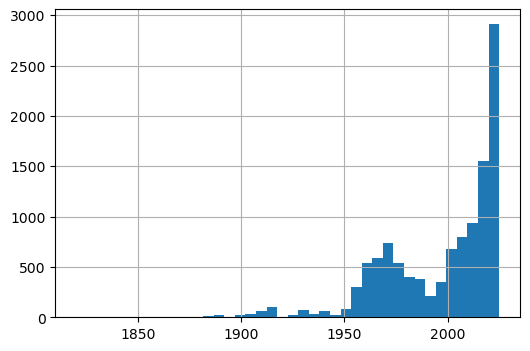

In [327]:
df['house_age'].hist(bins=40);

In [328]:
df['house_age'] = df['house_age'].fillna(df['house_age'].mean())

# Материал стен

In [329]:
df.head()

,flat_price,rooms,area,living_area,kitchen_area,floor,finishing,deal_type,house_age,wall_material,house_series,house_floors,elevator,latitude,longitude,Тип перекрытий,flat_links
0,23.950,3.0,73.8,45.0,10.0,2.0,Косметический,Свободная продажа,2002.0,Железобетон,П-44Т,17.0,есть,55.672011,37.570878,NaN,https://domclick.ru/card/sale__flat__1847719187
1,14.500,1.0,48.4,20.2,14.6,7.0,Евро,Свободная продажа,2015.0,Монолитный,а-типовой,27.0,есть,55.558641,37.559308,NaN,https://domclick.ru/card/sale__flat__1798260328
2,59.990,3.0,90.0,54.0,15.0,7.0,Отсутствует,Свободная продажа,2020.0,Монолитный,NaN,11.0,NaN,55.754279,37.544764,Железобетонный,https://domclick.ru/card/sale__flat__1786363895
3,16.800,2.0,51.0,35.6,8.7,1.0,Косметический,Свободная продажа,1969.0,Кирпичный,"14/14, индивидуальный",14.0,есть,55.684102,37.544432,Железобетонный,https://domclick.ru/card/sale__flat__1854172438
4,14.599,2.0,47.0,29.0,6.5,6.0,Дизайнерский,Свободная продажа,1969.0,Железобетон,1-515-9,9.0,есть,"55.63194,",7.602633},NaN,https://domclick.ru/card/sale__flat__1849710256


In [330]:
df['wall_material'].replace({'Кирпично-монолитный':'Монолитно-кирпичный', 'Железобетонная панель':'Панельный'},inplace=True)
df = df[~df['wall_material'].isin(['Деревянный','Керамзитобетон'])]

In [331]:
df['wall_material'].value_counts()

Монолитный             4937
Кирпичный              1840
Железобетон            1637
Панельный              1541
Блочный                 764
Монолитно-кирпичный     329
Смешанные               273
Иные                    125
Name: wall_material, dtype: int64

In [332]:
df['wall_material'] = df['wall_material'].fillna(df['wall_material'].mode()[0])

In [333]:
df['wall_material'].isna().mean()

0.0

# Серия дома

In [334]:
df['house_series'].fillna('Серия неизвестна', inplace=True)

# Кол-во этажей

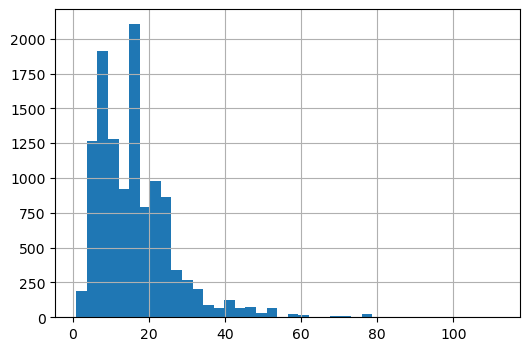

In [336]:
df['house_floors'].hist(bins=40);

In [338]:
df = df[~df['house_floors'].isna()]

# Лифт

In [339]:
df['elevator'].fillna('Неизвестно',inplace=True)

# Широта

In [340]:
df.head()

,flat_price,rooms,area,living_area,kitchen_area,floor,finishing,deal_type,house_age,wall_material,house_series,house_floors,elevator,latitude,longitude,Тип перекрытий,flat_links
0,23.950,3.0,73.8,45.0,10.0,2.0,Косметический,Свободная продажа,2002.0,Железобетон,П-44Т,17.0,есть,55.672011,37.570878,NaN,https://domclick.ru/card/sale__flat__1847719187
1,14.500,1.0,48.4,20.2,14.6,7.0,Евро,Свободная продажа,2015.0,Монолитный,а-типовой,27.0,есть,55.558641,37.559308,NaN,https://domclick.ru/card/sale__flat__1798260328
2,59.990,3.0,90.0,54.0,15.0,7.0,Отсутствует,Свободная продажа,2020.0,Монолитный,Серия неизвестна,11.0,Неизвестно,55.754279,37.544764,Железобетонный,https://domclick.ru/card/sale__flat__1786363895
3,16.800,2.0,51.0,35.6,8.7,1.0,Косметический,Свободная продажа,1969.0,Кирпичный,"14/14, индивидуальный",14.0,есть,55.684102,37.544432,Железобетонный,https://domclick.ru/card/sale__flat__1854172438
4,14.599,2.0,47.0,29.0,6.5,6.0,Дизайнерский,Свободная продажа,1969.0,Железобетон,1-515-9,9.0,есть,"55.63194,",7.602633},NaN,https://domclick.ru/card/sale__flat__1849710256


In [341]:
df['longitude'] = df['longitude'].apply(lambda x: '3' + str(x) if str(x).startswith('7') else str(x))
df['longitude'] = df['longitude'].apply(lambda x: '3' + str(x) if str(x).startswith('6') else str(x))
df['longitude'] = df['longitude'].apply(lambda x: '37' + str(x) if str(x).startswith('.') else str(x))

In [342]:
df['longitude'] = df['longitude'].str.replace('}','')
df['longitude'] = df['longitude'].str.replace(',','')
df['longitude'] = df['longitude'].str.replace('"','')
df['longitude'] = df['longitude'].str.replace('l','')

In [343]:
df['latitude'] = df['latitude'].str.replace('}','')
df['latitude'] = df['latitude'].str.replace(',','')
df['latitude'] = df['latitude'].str.replace('"','')
df['latitude'] = df['latitude'].str.replace('l','')
df['latitude'] = df['latitude'].str.replace('o','')

In [344]:
df['latitude'] = df['latitude'].apply(pd.to_numeric, errors='coerce')
df['longitude'] = df['longitude'].apply(pd.to_numeric, errors='coerce')

In [345]:
df.dropna(subset=['latitude','longitude'],inplace=True)
df = df[df['longitude'] < 39]

# Пробуем нарисовать

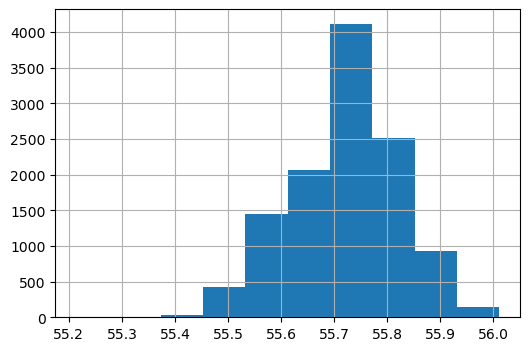

In [346]:
df['latitude'].hist();

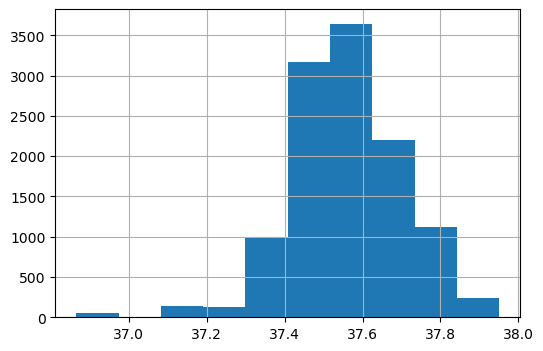

In [347]:
df['longitude'].hist();

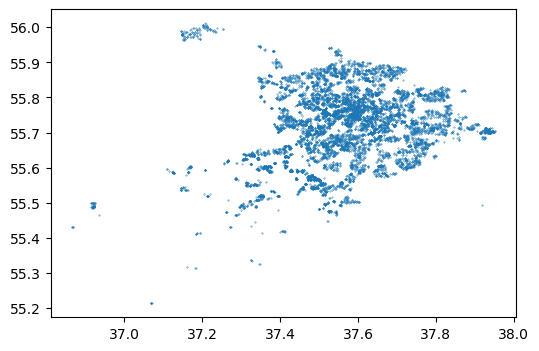

In [348]:
plt.scatter(x=df['longitude'], y=df['latitude'],s = 0.1)
plt.rcParams["figure.figsize"] = (12,12)
plt.show();

# Добавим расстояние от центра Москвы

In [349]:
moscow_centre = [55.751999,37.617734]
moscow_centre

[55.751999, 37.617734]

In [350]:
df['center_distance'] = df.apply(lambda x: geopy.distance.geodesic([x.latitude, x.longitude], moscow_centre).km, axis=1)


In [351]:
df.drop(columns=['flat_links','Тип перекрытий'],inplace=True)

# Обучаем модель

In [352]:
df.head()

,flat_price,rooms,area,living_area,kitchen_area,floor,finishing,deal_type,house_age,wall_material,house_series,house_floors,elevator,latitude,longitude,center_distance
0,23.950,3.0,73.8,45.0,10.0,2.0,Косметический,Свободная продажа,2002.0,Железобетон,П-44Т,17.0,есть,55.672011,37.570878,9.379958
1,14.500,1.0,48.4,20.2,14.6,7.0,Евро,Свободная продажа,2015.0,Монолитный,а-типовой,27.0,есть,55.558641,37.559308,21.839506
2,59.990,3.0,90.0,54.0,15.0,7.0,Отсутствует,Свободная продажа,2020.0,Монолитный,Серия неизвестна,11.0,Неизвестно,55.754279,37.544764,4.588805
3,16.800,2.0,51.0,35.6,8.7,1.0,Косметический,Свободная продажа,1969.0,Кирпичный,"14/14, индивидуальный",14.0,есть,55.684102,37.544432,8.852520
4,14.599,2.0,47.0,29.0,6.5,6.0,Дизайнерский,Свободная продажа,1969.0,Железобетон,1-515-9,9.0,есть,55.631940,37.602633,13.400608


In [353]:
X, y = df.drop(columns='flat_price'), df['flat_price']

In [354]:
cat_cols = X.columns[X.dtypes == 'object']
cat_cols

Index(['finishing', 'deal_type', 'wall_material', 'house_series', 'elevator'], dtype='object')

In [355]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [356]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
p1 = Pipeline([
    ('target_encoder_', TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model', RandomForestRegressor()),
])

In [362]:
%%time
for i, pipe in enumerate([p1]):
    cv_res = cross_validate(pipe,
                            X,
                            y,
                            cv=5,
                            scoring=('r2','neg_root_mean_squared_error'), n_jobs=-1
                           )
    print(f"Pipeline {i }: mean cv r2 = {cv_res['test_r2'].mean()}\nPipeline {i}: mean cv rmse = {cv_res['test_neg_root_mean_squared_error'].mean()}")

Pipeline 0: mean cv r2 = 0.8782625155573502
Pipeline 0: mean cv rmse = -16.519506735159958
CPU times: user 21.4 ms, sys: 5.95 ms, total: 27.3 ms
Wall time: 4.79 s


In [160]:
encoder = TargetEncoder()
encoder.fit(X,y)

TargetEncoder(cols=['finishing', 'deal_type', 'wall_material', 'house_series',
                    'elevator'])

In [161]:
X_tr = encoder.transform(X)

In [162]:
scal = StandardScaler()
scal.fit(X_tr)
X_tr = pd.DataFrame(scal.transform(X_tr),columns=X.columns)
X_tr.head()

,rooms,area,living_area,kitchen_area,floor,finishing,deal_type,house_age,wall_material,house_series,house_floors,elevator,latitude,longitude,center_distance
0,0.681989,0.046283,0.153631,-0.342402,-0.899332,-0.862193,0.420843,0.202128,-1.398733,-1.310693,0.031924,-0.514149,-0.471981,0.072141,-0.410911
1,-0.984793,-0.424040,-0.622327,0.290704,-0.218179,-0.573906,0.420843,0.680267,0.887951,-1.416347,1.005816,-0.514149,-1.596427,-0.008348,1.083014
2,0.681989,0.346253,0.435229,0.345757,-0.218179,0.210364,0.420843,0.864167,0.887951,0.393680,-0.552412,1.944962,0.343984,-0.109525,-0.985379
3,-0.151402,-0.375896,-0.140482,-0.521323,-1.035563,-0.862193,0.420843,-1.011610,0.384673,1.212975,-0.260244,-0.514149,-0.352058,-0.111834,-0.474151
4,-0.151402,-0.449963,-0.346987,-0.824112,-0.354410,1.144118,0.420843,-1.011610,-1.398733,-1.591356,-0.747190,-0.514149,-0.869420,0.293048,0.071173


In [163]:
model = RandomForestRegressor()
model.fit(X_tr, y)

RandomForestRegressor()

In [164]:
import pickle

In [165]:
with open('model.pickle','wb') as f:
  pickle.dump(model,f)

In [166]:
with open('encoder.pickle','wb') as f:
  pickle.dump(encoder,f)

In [167]:
with open('scal.pickle','wb') as f:
  pickle.dump(scal,f)

In [168]:
df.to_csv('clean_flats_data.csv')